# Handwritten Digit Recognition Project 🚀

Welcome to our exciting journey into the world of Deep Learning! In this project, you'll dive into the fascinating realm of handwritten digit recognition using PyTorch, one of the most popular machine learning libraries. 🧠💻

## Project Overview 📝

Your mission, should you choose to accept it, involves building and optimizing a PyTorch model to recognize handwritten digits from the MNIST dataset. This dataset is like the 'Hello World' of machine learning, perfect for beginners and yet intriguing for experienced coders. 🌟

## Learning Objectives 🎯

- **Understanding PyTorch**: Get hands-on experience with PyTorch, understanding its basic operations and how to build models with it.
- **Model Optimization**: Explore various training optimization techniques such as adding dropout layers, implementing regularizers, and utilizing early stopping to enhance model performance.
- **Experimentation**: Test different hyperparameters and observe how they impact your model's learning process and accuracy.

## Project Structure 🗂️

- **Data Preprocessing**: Learn how to prepare your data for optimal model training.
- **Model Building**: Design a neural network architecture suitable for digit recognition.
- **Training and Testing**: Implement the training loop, and test your model's performance.
- **Optimization Techniques**: Apply different optimization strategies to improve your model.

## TODOs 📌

Throughout this notebook, you'll find `TODO` sections. These are areas where you'll need to apply what you've learned and write your own code. Don't worry, though; guidance and hints are provided to help you on your journey!

So, are you ready to embark on this adventure in machine learning? Let's get started! 🚀👩‍💻👨‍💻

---

Remember, the goal of this project is not just to build a model but to experiment and learn. Every challenge you encounter is an opportunity to grow. Let's do this! 💪


## Loading the MNIST Dataset 📚

Before diving into the model building, the first crucial step is to load our dataset. In this section, you'll learn how to load and visualize the MNIST dataset, which is a collection of 70,000 grayscale images of handwritten digits (0 through 9). This dataset is widely used for training and testing in the field of machine learning. 🤖📈



In [3]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# TODO: Define a transform to normalize the data
transform = transforms.Compose([
    # TODO: Add necessary transformations
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# TODO: Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# TODO: Create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 22156885.25it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 613432.25it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5519369.49it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3160339.88it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# TODO: Figure out how many images are in the train_set and test_set.
num_train_images = len(train_set)
num_test_images = len(test_set)

In [5]:
num_train_images

60000

In [6]:
num_test_images

10000

## Building the Neural Network Model 🛠️

Now that our dataset is ready, it's time to build the neural network model that will learn to recognize handwritten digits. In this section, you will define the architecture of your neural network.

### Key Concepts:
- **Layers**: Neural networks are composed of layers. Each layer has a specific role, like convolutional layers for feature extraction or fully connected (dense) layers for decision making.
- **Activation Functions**: These functions introduce non-linear properties to the network, allowing it to learn more complex patterns.

In [14]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F

# TODO: Define the neural network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO: Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 10) # First fully connected layer

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        return x

# Create an instance of the network
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


## Training the Neural Network Model 🏋️‍♀️🏋️‍♂️

With our neural network model defined, the next exciting step is to train it. This process involves feeding the training data to the model and adjusting the model parameters (weights and biases) based on the computed loss and the chosen optimization algorithm.

### Key Concepts:
- **Loss Function**: Measures how well the model performs. A common choice for classification tasks is Cross-Entropy Loss.
- **Optimizer**: Helps in updating the model parameters based on the computed gradients. We'll be using Stochastic Gradient Descent (SGD) in this example.
- **Epochs**: One epoch means the model has seen the entire dataset once. Training for multiple epochs means going through the dataset multiple times.



In [30]:
# TODO: Complete this code
# Import optimizer
from torch.optim import SGD

# TODO: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

# TODO: Set the number of epochs
num_epochs = 10
train_losses = []
test_losses = []
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # TODO: Complete Training pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        #print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        print(f"Epoch {epoch+1}, Training Loss: {avg_train_loss}")

    # TODO: evaluate on the test_loader
    test_loss = 0.0
    for images, labels in test_loader:
        # TODO: Complete evaluation pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    else:
        #print(f" Loss: {test_loss/len(test_loader)}")
        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)
        print(f"Epoch {epoch+1}, Test Loss: {avg_test_loss}")
print("Training is finished!")

Epoch 1, Training Loss: 0.40411353874594164
Epoch 1, Test Loss: 0.3013720326006982
Epoch 2, Training Loss: 0.3249753128522749
Epoch 2, Test Loss: 0.3012634633512349
Epoch 3, Training Loss: 0.31428077789956826
Epoch 3, Test Loss: 0.31855968029422177
Epoch 4, Training Loss: 0.3037454455233078
Epoch 4, Test Loss: 0.32414152375926636
Epoch 5, Training Loss: 0.3004213675483267
Epoch 5, Test Loss: 0.3195253988122864
Epoch 6, Training Loss: 0.2961295382348078
Epoch 6, Test Loss: 0.3009213512098998
Epoch 7, Training Loss: 0.28922123430983854
Epoch 7, Test Loss: 0.2910392471666264
Epoch 8, Training Loss: 0.2928272145492499
Epoch 8, Test Loss: 0.2939062852020951
Epoch 9, Training Loss: 0.28836809389039014
Epoch 9, Test Loss: 0.3005508423729497
Epoch 10, Training Loss: 0.28480793745803046
Epoch 10, Test Loss: 0.3083311412958013
Training is finished!


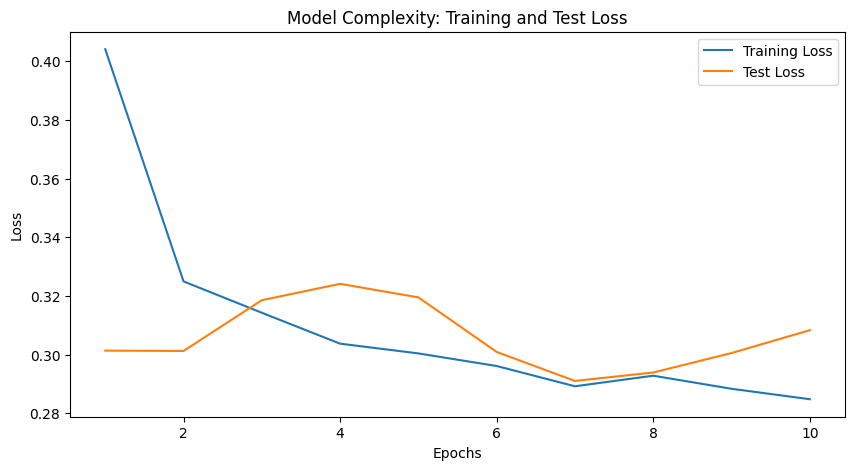

In [31]:
import matplotlib.pyplot as plt
# TODO: plot the model complexity graph
# Plot the model complexity graph
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Complexity: Training and Test Loss')
plt.legend()
plt.show()

### TODO1: Comment the model complexity graph
### We see in epoch 3 the training loss continues to decrease but at a slower rate stabilizing around 0.28 by epoch 10.and the test loss after epoch 5 shows a slight downward trend but increases again slightly towards the end, indicating that the model might be starting to overfit.




### TODO2: Change the model and add more layer (use a complex model)

In [16]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F

# TODO: Define the neural network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO: Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 128) # First fully connected layer
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the network
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Epoch 1, Training Loss: 0.43737538764948275, Test Loss: 0.20867285968818863, Accuracy: 93.87%
Epoch 2, Training Loss: 0.1797519304177988, Test Loss: 0.14504568825570782, Accuracy: 95.33%
Epoch 3, Training Loss: 0.1295057663034751, Test Loss: 0.11131704368392766, Accuracy: 96.77%
Epoch 4, Training Loss: 0.10606401347056794, Test Loss: 0.1362576371534864, Accuracy: 95.62%
Epoch 5, Training Loss: 0.08891458338700425, Test Loss: 0.09365648082138639, Accuracy: 97.08%
Epoch 6, Training Loss: 0.07459234170986018, Test Loss: 0.10687854076746056, Accuracy: 96.75%
Epoch 7, Training Loss: 0.0670062391353505, Test Loss: 0.07869931900425915, Accuracy: 97.54%
Epoch 8, Training Loss: 0.058921146873277486, Test Loss: 0.09084017069223944, Accuracy: 97.25%
Epoch 9, Training Loss: 0.05122392554723991, Test Loss: 0.09872074286995833, Accuracy: 97.01%
Epoch 10, Training Loss: 0.047798752764623156, Test Loss: 0.07709070564444906, Accuracy: 97.81%
Training is finished!
Length of train_losses: 10
Length of te

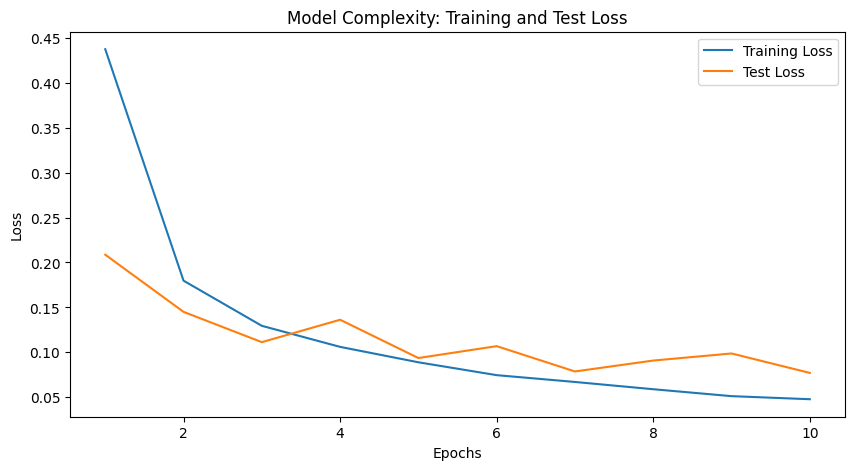

In [20]:
import matplotlib.pyplot as plt
# TODO: Complete this code
# Import optimizer
from torch.optim import SGD

# TODO: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)

# TODO: Set the number of epochs
num_epochs = 10
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # TODO: Complete Training pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # TODO: evaluate on the test_loader
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
          # TODO: Complete evaluation pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate average test loss for the epoch
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    # Print losses and accuracy for the epoch
    print(f"Epoch {epoch+1}, Training Loss: {avg_train_loss}, Test Loss: {avg_test_loss}, Accuracy: {100 * correct / total}%")

print("Training is finished!")

# Plotting the model complexity graph
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Complexity: Training and Test Loss')
plt.legend()
plt.show()


## Implementing Early Stopping 🛑

One of the key techniques in training neural networks effectively is 'Early Stopping'. This technique halts the training process if the model performance stops improving on a held-out validation set. Early stopping is a form of regularization used to avoid overfitting.

### Key Concepts:
- **Validation Loss**: Monitor the loss on a validation set to detect when it begins to increase, indicating overfitting.

In [33]:
# TODO: Complete this code to implement Early stopping
num_epochs = 50
patience = 2
min_delta = 0.001
best_loss = None
patience_counter = 0
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)
# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # evaluation phase
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in validation_loader:
            output = model(images)
            loss = criterion(output, labels)
            validation_loss +=loss.item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    validation_loss /= len(validation_loader)

    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

    # Early stopping logic
    if best_loss is None or validation_loss < best_loss - min_delta:
        best_loss = validation_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

print("Training is finished!")

Epoch 1, Training Loss: 0.2818532275683336, Validation Loss: 0.29532653138421144
Epoch 2, Training Loss: 0.27931854640369985, Validation Loss: 0.29379973117451946
Epoch 3, Training Loss: 0.27793070488075206, Validation Loss: 0.2837863952562118
Epoch 4, Training Loss: 0.2797245493512164, Validation Loss: 0.28236230987770733
Epoch 5, Training Loss: 0.27823964133461526, Validation Loss: 0.3301716658648602
Epoch 6, Training Loss: 0.28065328794056926, Validation Loss: 0.30537480456386784
Early stopping triggered!
Training is finished!


In [ ]:
# TODO: Answer this questions
# What does min_delta and patience refer to ?
# What is different from the first training ?

# min_delta and patience refer to :

*   min_delta : This parameter specifies the minimum change in the validation loss
*  patience : is the number of epochs to wait for an improvement in validation loss before stopping the training. If the validation loss does not improve by min_delta for a number of epochs equal to patience, training is stopped early

# different from the first training :
Without early stopping, training would have continued despite the validation loss increasing and leading to further overfitting.

## Experimenting with Dropout 🌧️

Dropout is a regularization technique that temporarily drops units (along with their connections) from the neural network during training. This prevents units from co-adapting too much and helps the model to generalize better to unseen data.

### Key Concepts:
- **Dropout Rate**: The probability of a neuron being dropped during training. Common rates are 0.2, 0.5, etc.
- **Generalization**: Dropout improves the generalization of the model on the test data.


In [23]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout()  # Dropout layer with 20% probability
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout()  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Forward pass with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Create an instance of the network with dropout
model_with_dropout = NetWithDropout()
print(model_with_dropout)

NetWithDropout(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# TODO: Train the dropout model
# What do you notice ?

# The results from the training indicate that both the training and validation losses are not improving i think one of the reasons that 0.5 is High dropout rates in this case

In [25]:
# Early stopping parameters
num_epochs = 20
patience = 3
min_delta = 0.1
best_loss = None
patience_counter = 0
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)
# Training loop with early stopping
for epoch in range(num_epochs):
    model_with_dropout.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model_with_dropout(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Evaluation phase
    model_with_dropout.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in validation_loader:
            output = model_with_dropout(images)
            loss = criterion(output, labels)
            validation_loss += loss.item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    validation_loss /= len(validation_loader)

    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

    # Early stopping logic
    if best_loss is None or validation_loss < best_loss - min_delta:
        best_loss = validation_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

print("Training is finished!")

Epoch 1, Training Loss: 2.32613188930666, Validation Loss: 2.3164894945302588
Epoch 2, Training Loss: 2.325561109636384, Validation Loss: 2.3164894945302588
Epoch 3, Training Loss: 2.325702403908345, Validation Loss: 2.3164894945302588
Epoch 4, Training Loss: 2.328352124197905, Validation Loss: 2.3164894945302588
Early stopping triggered!
Training is finished!


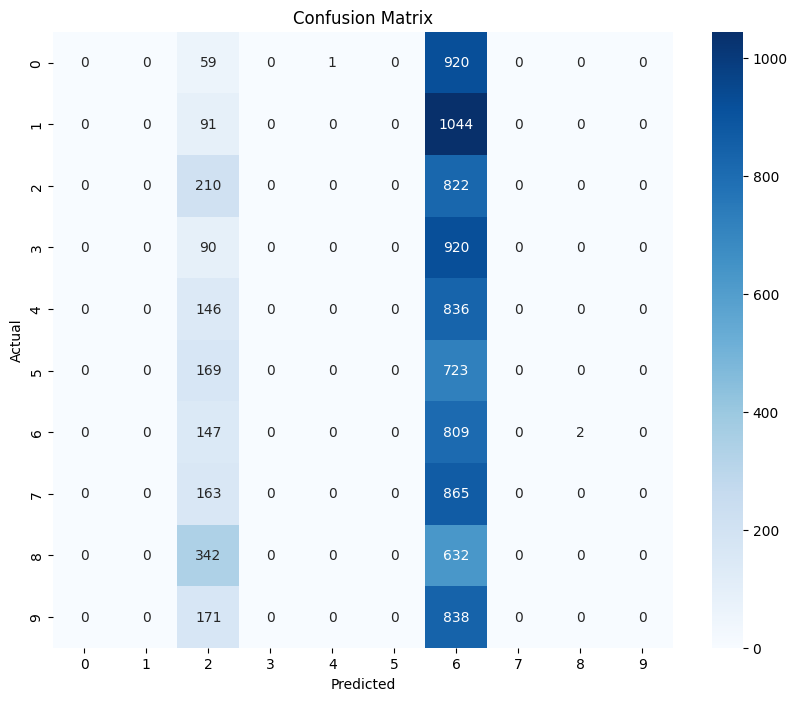

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
# Compute confusion matrix
all_preds = []
all_labels = []
model_with_dropout.eval()
with torch.no_grad():
    for images, labels in validation_loader:
        output = model_with_dropout(images)
        _, preds = torch.max(output, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Submitting Your Project on GitHub 🚀

Submitting your project on GitHub not only allows you to showcase your work but also helps in version control and collaboration. Here's how you can do it:

### Step 1: Create a New Repository on GitHub
1. **Sign in to GitHub**: Go to [GitHub](https://github.com) and sign in with your account.
2. **Create a New Repository**: Click on the '+' icon in the top right corner and select 'New repository'.
3. **Name Your Repository**: Give your repository a meaningful name, like 'handwritten-digit-recognition'.
4. **Initialize with a README**: Check the box 'Initialize this repository with a README'.
5. **Create Repository**: Click the 'Create repository' button.

### Step 2: Clone the Repository to Your Local Machine
1. **Copy the Repository URL**: On your repository page on GitHub, click the 'Code' button and copy the URL.
2. **Clone in Terminal**: Open your terminal, navigate to where you want the repository, and run `git clone [URL]`, replacing `[URL]` with the URL you copied.

### Step 3: Add Your Project to the Repository
1. **Copy Your Notebook**: Place your Jupyter notebook file into the cloned repository folder on your local machine.
2. **Add the File**: Run `git add [filename]` in your terminal, replacing `[filename]` with the name of your notebook file.

### Step 4: Commit and Push Your Changes
1. **Commit Your Changes**: Run `git commit -m "Add project notebook"`.
2. **Push to GitHub**: Run `git push` to push your changes to the GitHub repository.

### Step 5: Create and Edit the README File
1. **Edit README.md**: On GitHub, open the README.md file and click the pencil icon to edit.
2. **Write Your README**: Include a project title, a brief description, installation instructions, and usage instructions. Optionally, add screenshots or additional sections as needed.
3. **Save Changes**: After editing, commit your changes by clicking 'Commit changes' at the bottom.

### 📌 TODOs for Submission:
- Ensure your Jupyter notebook is well-commented and formatted.
- Write a clear, concise README that effectively describes your project.
- Double-check that all files have been committed and pushed to your GitHub repository.

---

Remember, a well-documented GitHub repository not only reflects your technical skills but also your ability to communicate and present your work effectively. Happy coding and best of luck with your project submission! 🌟👩‍💻👨‍💻
